# imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_iris, make_blobs
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# dataset preparation

In [46]:
X, y = make_blobs(n_samples=60, centers=2)

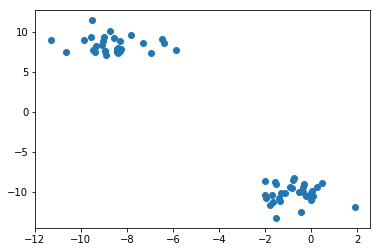

In [47]:
plt.scatter(X[:,0], X[:, 1])
plt.show()

In [48]:
svm = SVC(kernel='linear')
svm.fit(X, y)
accuracy_score(svm.predict(X), y)

1.0

# plot support vectors (in red), separating hyperplanes and decision boundary

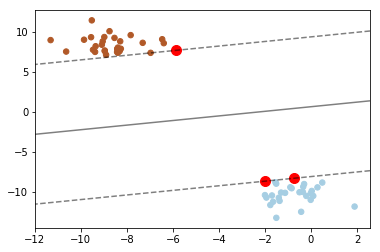

In [49]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='r')
plt.show()

In [2]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [53]:
X, y = load_iris(True)

In [9]:
for _ in range(5):
    results = {}
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.66)
    for kernel in ['linear', 'rbf', 'poly']:
        svm = SVC(kernel=kernel)
        svm.fit(X_train, y_train)
        results[f'svm_{kernel}'] = f'{svm.score(X_test, y_test):.3f}'
    nn = KNeighborsClassifier(n_neighbors=1)
    nn.fit(X_train, y_train)
    results['1nn'] = f'{nn.score(X_test, y_test):.3f}'
    print(results)

{'svm_linear': '1.000', 'svm_rbf': '0.980', 'svm_poly': '1.000', '1nn': '1.000'}
{'svm_linear': '0.961', 'svm_rbf': '0.961', 'svm_poly': '0.902', '1nn': '0.980'}
{'svm_linear': '0.980', 'svm_rbf': '0.961', 'svm_poly': '0.941', '1nn': '0.961'}
{'svm_linear': '0.980', 'svm_rbf': '0.980', 'svm_poly': '1.000', '1nn': '0.980'}
{'svm_linear': '0.980', 'svm_rbf': '0.961', 'svm_poly': '0.961', '1nn': '0.941'}


/home/unj/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


We can see that on such a simple example which is linearly separable there is no advantage of using more complex kernels than linear one.

### applying PCA

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.66)
pca = PCA(n_components=2)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

/home/unj/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


linear 1.0


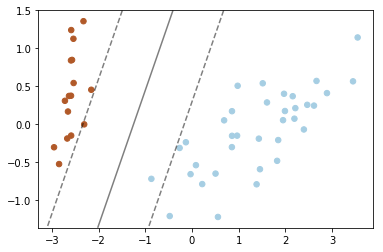

linear 0.666666666667


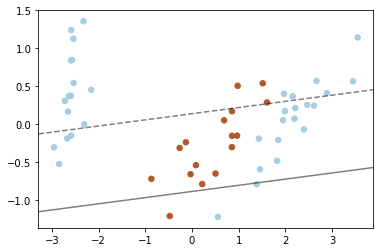

linear 0.960784313725


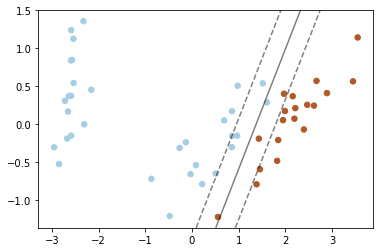

rbf 1.0


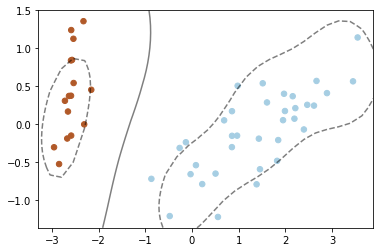

rbf 0.960784313725


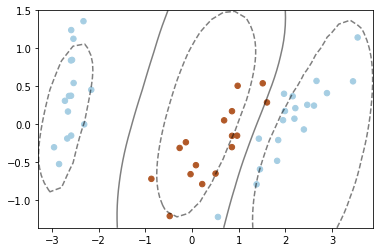

rbf 0.960784313725


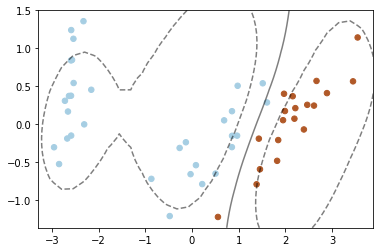

poly 1.0


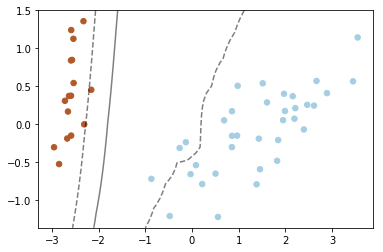

poly 0.686274509804


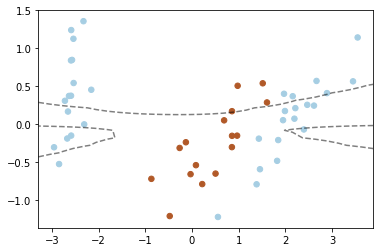

poly 0.960784313725


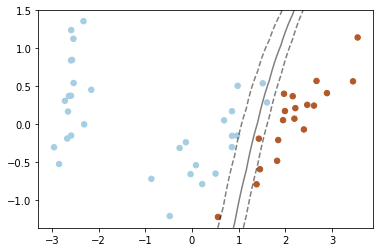

In [96]:
for kernel in ['linear', 'rbf', 'poly']:    
    for idx in range(3):
        svm = SVC(kernel=kernel)
        svm.fit(X_train_pca, y_train==idx)
        print(kernel, svm.score(X_test_pca, y_test==idx))
        plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test==idx, s=30, cmap=plt.cm.Paired)

        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()

        xx = np.linspace(xlim[0], xlim[1], 30)
        yy = np.linspace(ylim[0], ylim[1], 30)
        YY, XX = np.meshgrid(yy, xx)
        xy = np.vstack([XX.ravel(), YY.ravel()]).T

        Z = svm.decision_function(xy).reshape(XX.shape)

        ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                   linestyles=['--', '-', '--'])
        plt.show()

From the examples above we can see the behaviour of "rbf" kernel, which is surrounding classes with result boundary.

In [98]:
from sklearn.datasets import make_circles

In [99]:
X, y = make_circles(n_samples=400, factor=.3, noise=.05)

linear 0.6875


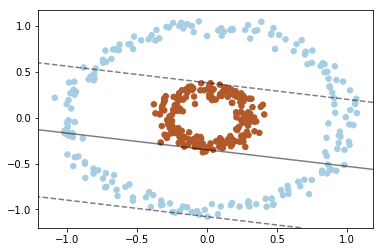

poly 0.61


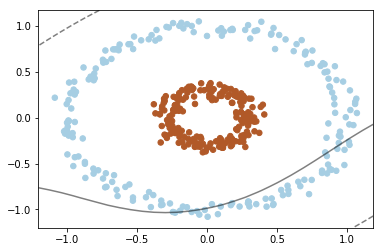

rbf 1.0


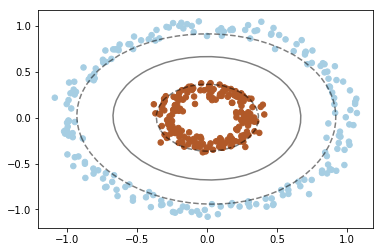

In [105]:
for kernel in ['linear', 'poly', 'rbf']:
    svm = SVC(kernel=kernel)
    svm.fit(X, y)
    print(kernel, svm.score(X, y))
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T

    Z = svm.decision_function(xy).reshape(XX.shape)

    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    plt.show()

Above example is really suitable for demonstrating power of rbf kernel, linear kernel (and polynomial with low degree) aren't able to overfit such dataset.

# eigenfaces 

In [106]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from scipy.misc import imread
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score

### data preparation

In [107]:
folders = glob('./lfw_funneled/*')

In [108]:
paths = []
for folder in folders:
    faces = glob(folder + '/*')
    if len(faces) >= 70:
        paths.append(folder)

In [109]:
images = []
labels = []
for idx, folder in enumerate(paths):
    new_paths = glob(folder + '/*')
    new_images = [imread(path) for path in new_paths]
    images.extend(new_images)
    labels.extend([idx] * len(new_images))

In [114]:
images = np.array(images)
labels = np.array(labels)

### data splitting and transforming

In [115]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, train_size=0.75)

/home/unj/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [116]:
img_shape = X_train[0].shape

In [117]:
train_len = len(X_train)

In [118]:
pca = PCA(n_components=150)
pca.fit(X_train.reshape(train_len, -1))

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [119]:
main_components = pca.components_[:10]

In [123]:
main_components_scaled = (main_components - main_components.min()) / (main_components.max() - main_components.min())

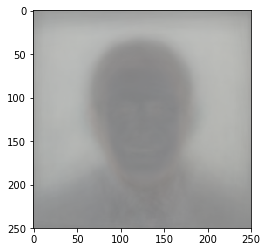

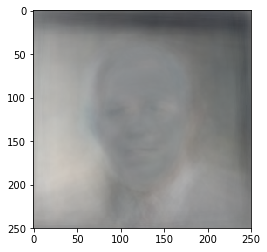

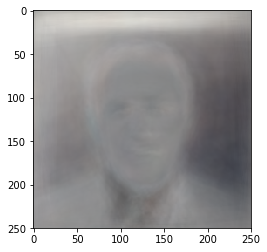

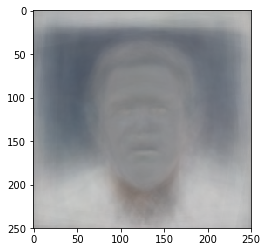

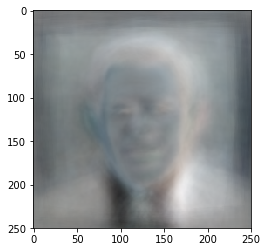

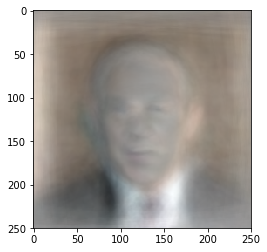

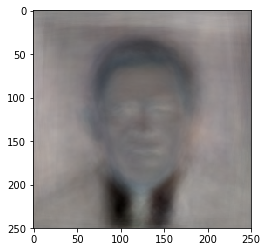

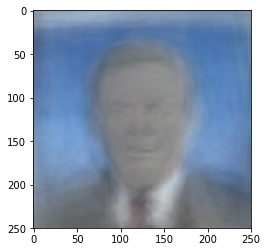

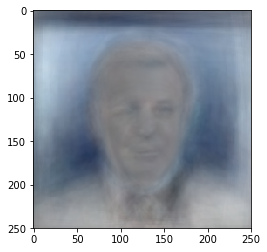

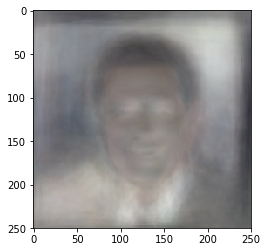

In [131]:
for comp in main_components_scaled:
    img = comp.reshape(250, 250, 3)
    plt.imshow(img)
    plt.show()

After rescaling top 10 PCA components to (0, 1) values, we can see that each of them represents a face, as it was supposed to be.

In [132]:
pca = PCA(n_components=150)
train_len = len(X_train)
test_len = len(X_test)
train_features = pca.fit_transform(X_train.reshape(train_len, -1))

test_features = pca.transform(X_test.reshape(test_len, -1))
svm = SVC(kernel='rbf')
svm.fit(train_features, y_train)
y_pred = svm.predict(test_features)

In [133]:
accuracy_score(y_pred, y_test)

0.42236024844720499

Using RBF kernel here results in really low accuracy score. Let's check if we can improve it and see how the score changes with train/test set ratio.

In [140]:
from collections import defaultdict

In [149]:
precisions = defaultdict(lambda: defaultdict(list))
recalls = defaultdict(lambda: defaultdict(list))
params = [
    {'kernel': 'rbf', 'C': 0.01},
    {'kernel': 'rbf', 'C': 1000},
    {'kernel': 'linear'}
]
for param in params:
#     print(param)
    for train_size in np.linspace(0.9, 0.1, 9):
        X_train, X_test, y_train, y_test = train_test_split(images, labels, train_size=train_size)
        train_len = len(X_train)
        test_len = len(X_test)
        pca = PCA(n_components=150)
        train_features = pca.fit_transform(X_train.reshape(train_len, -1))

        test_features = pca.transform(X_test.reshape(test_len, -1))
        svm = SVC(**param)
        svm.fit(train_features, y_train)
        y_pred = svm.predict(test_features)

        for cls in np.unique(labels):
            pred = (y_pred==cls).astype(np.int)
            test = (y_test==cls).astype(np.int)
            precision = precision_score(test, pred)
            recall = recall_score(test, pred)
            precisions[tuple(param.values())][cls].append(precision)
            recalls[tuple(param.values())][cls].append(recall)
#             print(f"Person: {cls} Train size {train_size*100:.2f}%: precision: {precision:.2f} recall: {recall:.2f}")
#         print()

/home/unj/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/home/unj/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/unj/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


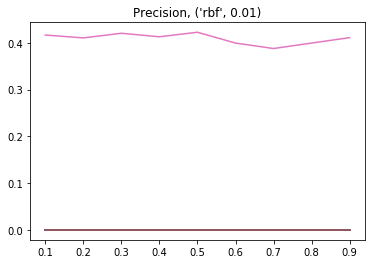

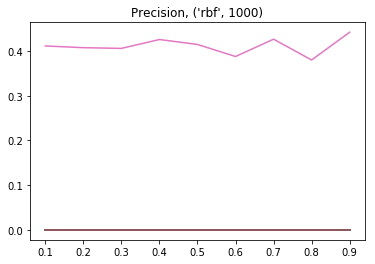

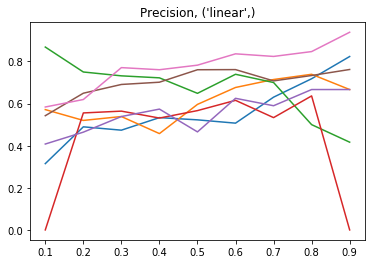

In [163]:
for param_name, param_value in precisions.items():
    for person_name, person_value in param_value.items():
        plt.plot(np.linspace(0.9, 0.1, 9), person_value)
        plt.title(f'Precision, {param_name}')
    plt.show()

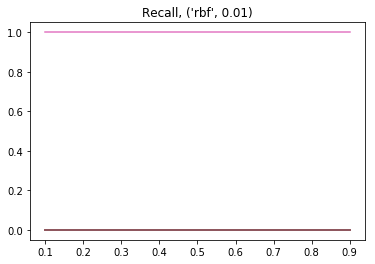

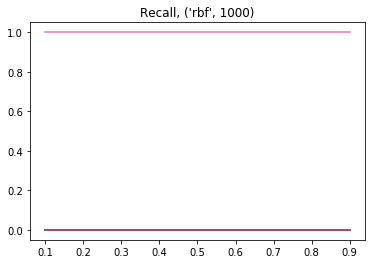

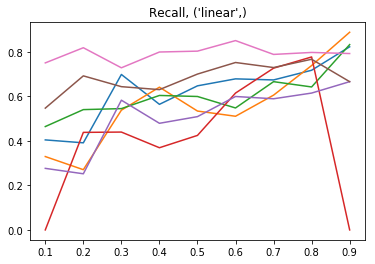

In [165]:
for param_name, param_value in recalls.items():
    for person_name, person_value in param_value.items():
        plt.plot(np.linspace(0.9, 0.1, 9), person_value)
        plt.title(f'Recall, {param_name}')
    plt.show()

From the charts above we can see that RBF kernel overfits really easily the dataset. It is hard to regularize it, changing the penalty coefficient doesn't help much. Only linear kernel shows some reasonable results. We can see the overall increase of the precision/recall scores with the size of training set. There is a drop at the end because of imbalanced set problem and possibility of bad train/test split (hence the warnings)

In [166]:
from collections import Counter

In [167]:
Counter(labels)

Counter({0: 144, 1: 109, 2: 77, 3: 71, 4: 121, 5: 236, 6: 530})